<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 184.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 136.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 135.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Load dataset
# Check missing values
print("Missing Values:\n", df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Fill missing values
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
df['JobSat'].fillna(df['JobSat'].median(), inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:\n", df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# df_cleaned = df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'])

Missing Values:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing Values After Handling:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_299/1539065916.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
/tmp/ipykernel_299/1539065916.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


  ExperienceRange  JobSat
0             0-5     7.0
1            5-10     7.0
2           10-20     7.0
3             >20     7.0


/tmp/ipykernel_299/722214428.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_299/722214428.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_jobsat, palette='viridis')


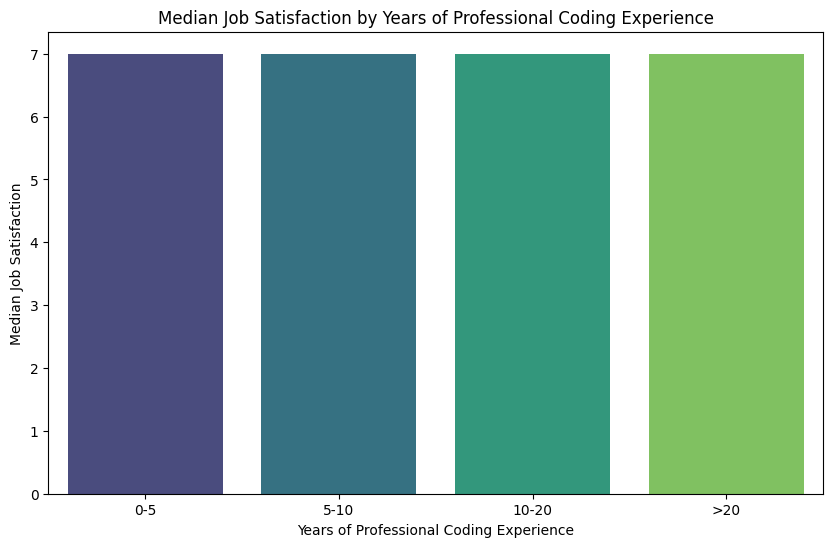

In [5]:
## Write your code here
import numpy as np
# Convert YearsCodePro to numeric (handle non-numeric values like 'Less than 1 year')
# df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 50})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each experience range
median_jobsat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Display the results
print(median_jobsat)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_jobsat, palette='viridis')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_299/221701953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis', order=df['JobSat'].value_counts().index)


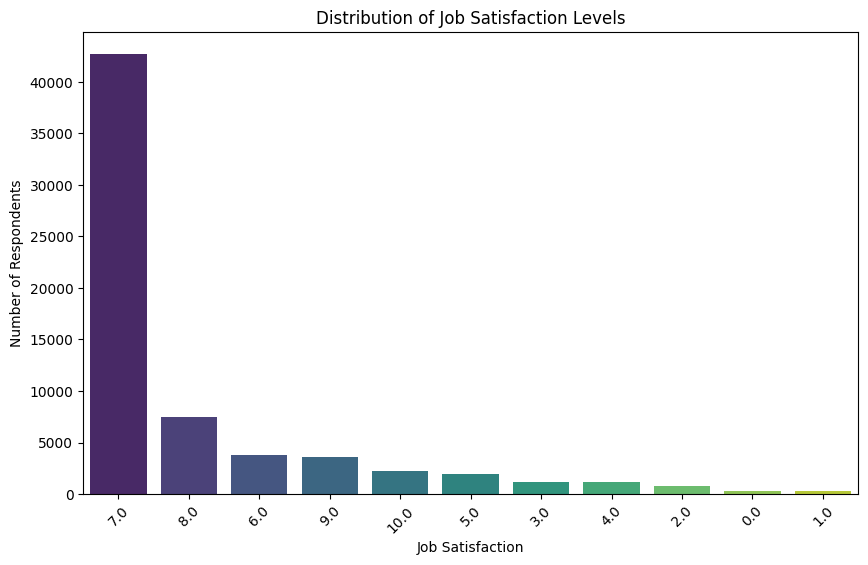

In [6]:
## Write your code here

# Create a count plot for JobSat
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df, palette='viridis', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_299/1044445721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis', order=df['RemoteWork'].value_counts().index)


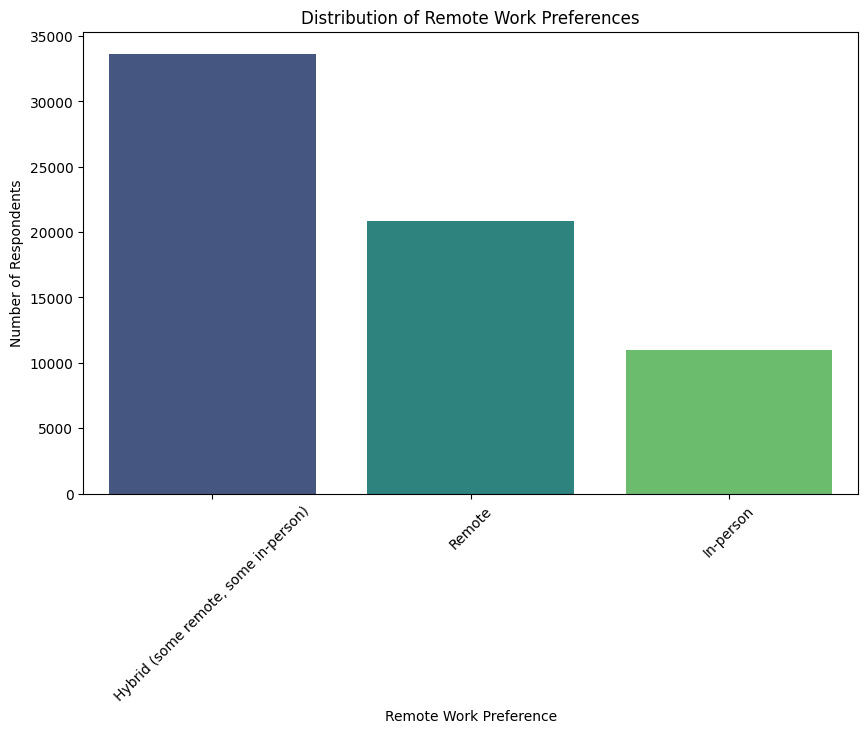

Remote Work Preferences by Employment Type:
 RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                 

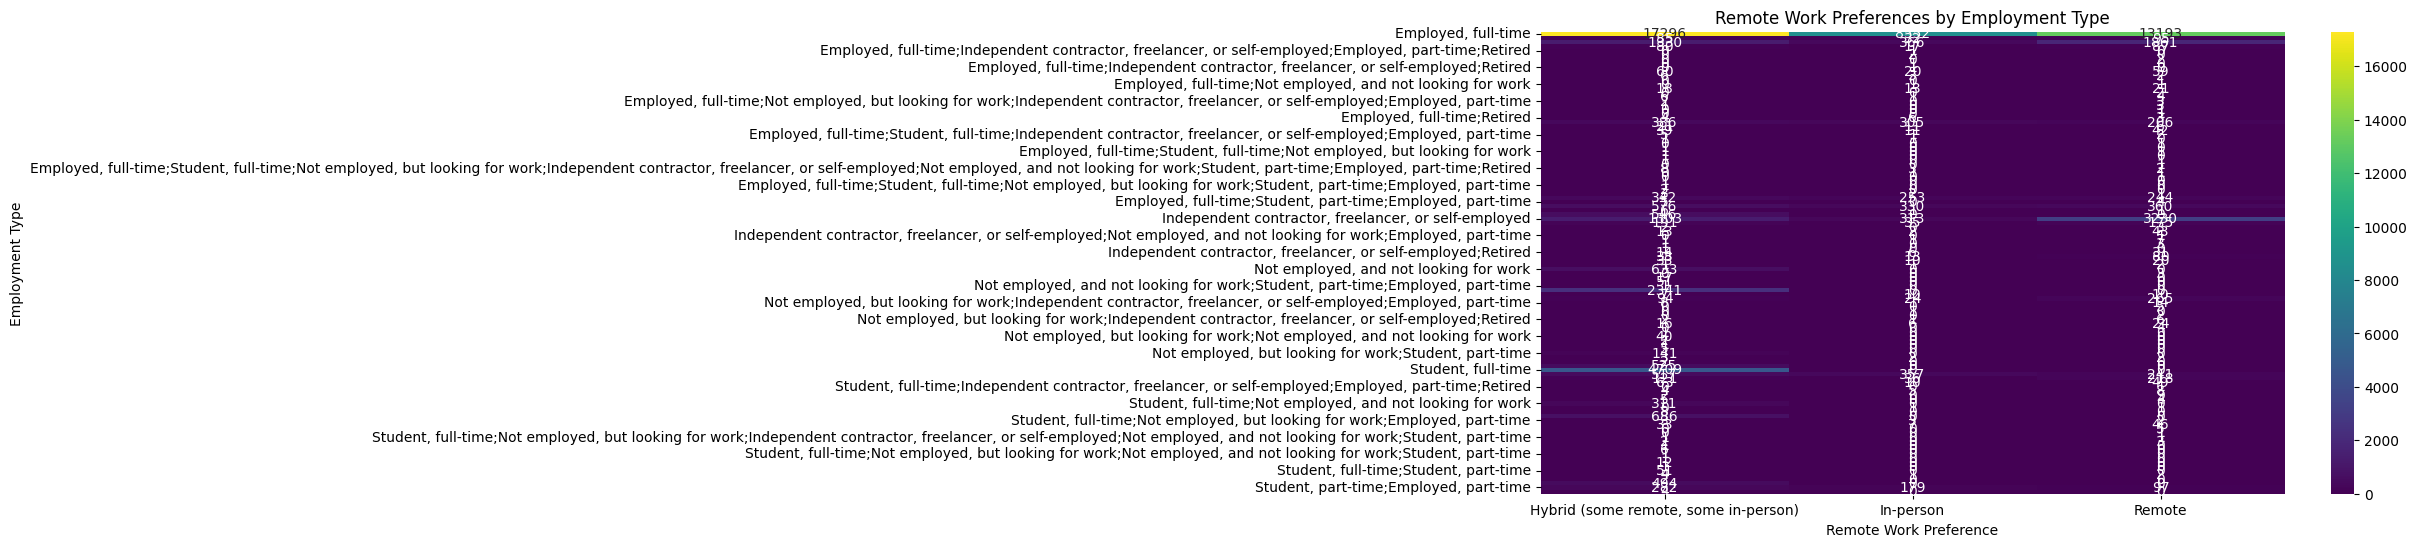

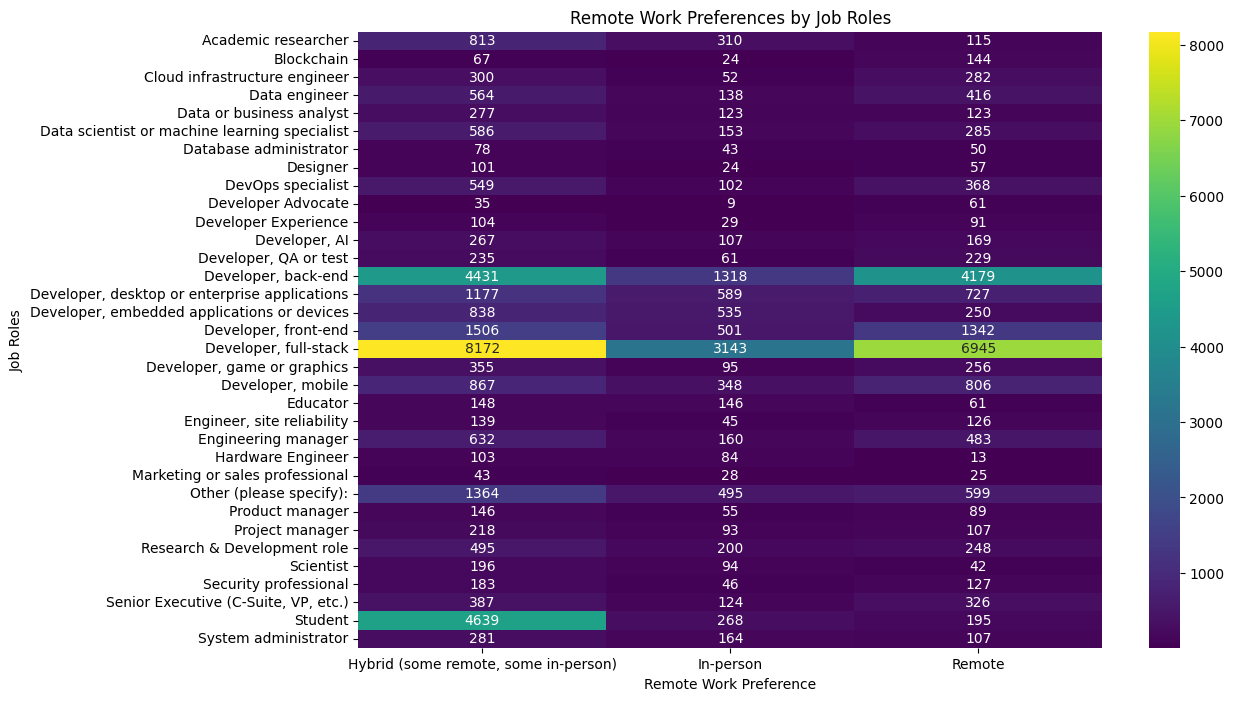

In [7]:

# Step 1: Count plot for RemoteWork distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df, palette='viridis', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

# Step 2: Cross-tabulate RemoteWork by Employment and Job Roles
# Example: Assuming 'Employment' column contains job types (e.g., Full-time, Part-time)
# and 'DevType' (or similar) contains job roles (e.g., Developer, Data Scientist, Manager)

# Create a cross-tabulation of RemoteWork by Employment
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print("Remote Work Preferences by Employment Type:\n", remote_by_employment)

# Create a cross-tabulation of RemoteWork by Job Roles
# Assuming 'DevType' is the column for job roles
remote_by_jobrole = pd.crosstab(df['DevType'], df['RemoteWork'])
print("\nRemote Work Preferences by Job Roles:\n", remote_by_jobrole)

# Step 3: Visualize cross-tabulated data
# Heatmap for RemoteWork by Employment
plt.figure(figsize=(12, 6))
sns.heatmap(remote_by_employment, annot=True, fmt='d', cmap='viridis')
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Remote Work Preference')
plt.ylabel('Employment Type')
plt.show()

# Heatmap for RemoteWork by Job Roles
plt.figure(figsize=(12, 8))
sns.heatmap(remote_by_jobrole, annot=True, fmt='d', cmap='viridis')
plt.title('Remote Work Preferences by Job Roles')
plt.xlabel('Remote Work Preference')
plt.ylabel('Job Roles')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_299/2913103046.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')


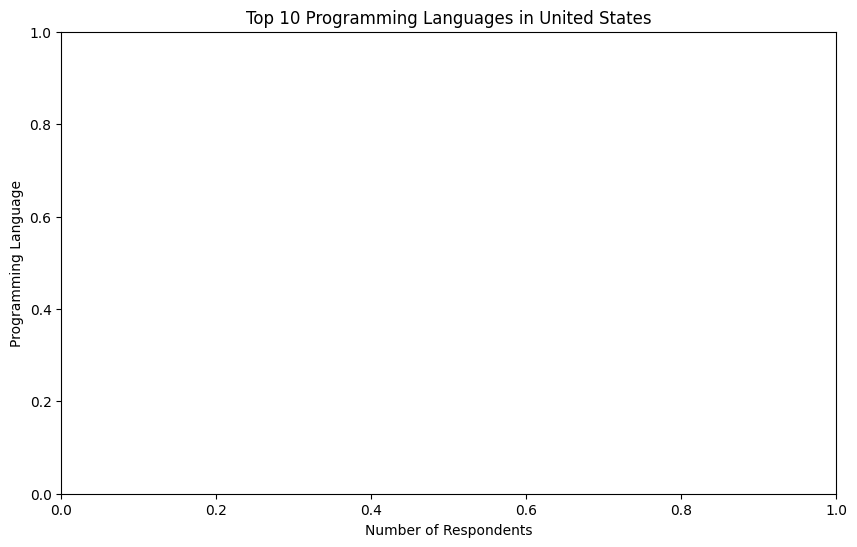

/tmp/ipykernel_299/2913103046.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Language', data=languages_df, palette='viridis')


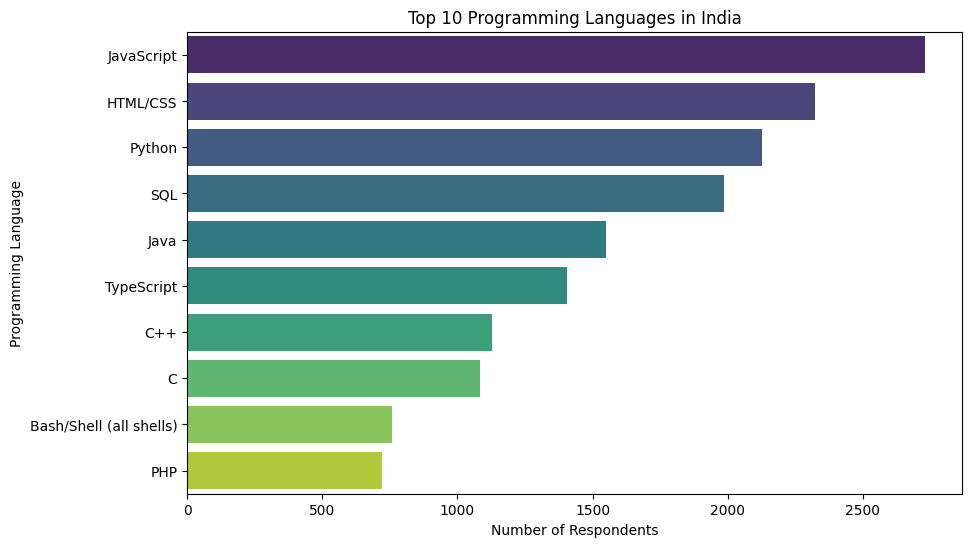

/tmp/ipykernel_299/2913103046.py:51: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data.fillna(0, inplace=True)


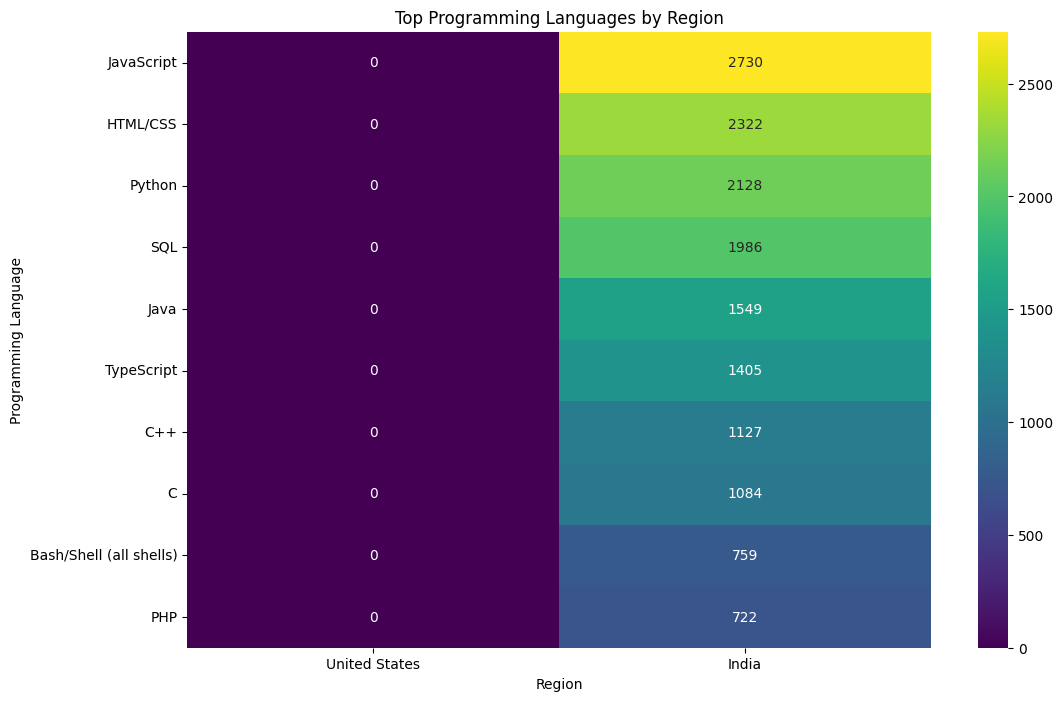

In [8]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Filter data by region (example: filter for the United States and India)
regions = ['United States', 'India']
df_filtered = df[df['Country'].isin(regions)]

# Step 2: Extract programming languages from LanguageHaveWorkedWith
# Split the semicolon-separated strings into lists of languages
df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')

# Step 3: Count language popularity by region
language_popularity = {}

for region in regions:
    # Filter data for the current region
    region_data = df_filtered[df_filtered['Country'] == region]
    
    # Flatten the list of languages and count their occurrences
    languages = [lang for sublist in region_data['Languages'].dropna() for lang in sublist]
    language_counts = Counter(languages)
    
    # Store the top 10 most popular languages for the region
    language_popularity[region] = language_counts.most_common(10)

# Step 4: Visualize the results
# Bar plot for each region
for region, languages in language_popularity.items():
    languages_df = pd.DataFrame(languages, columns=['Language', 'Count'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Language', data=languages_df, palette='viridis')
    plt.title(f'Top 10 Programming Languages in {region}')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Programming Language')
    plt.show()

# Heatmap for all regions
# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame()

for region, languages in language_popularity.items():
    temp_df = pd.DataFrame(languages, columns=['Language', region])
    temp_df.set_index('Language', inplace=True)
    heatmap_data = pd.concat([heatmap_data, temp_df], axis=1)

# Fill NaN values with 0 (for languages not in the top 10 of a region)
heatmap_data.fillna(0, inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis')
plt.title('Top Programming Languages by Region')
plt.xlabel('Region')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


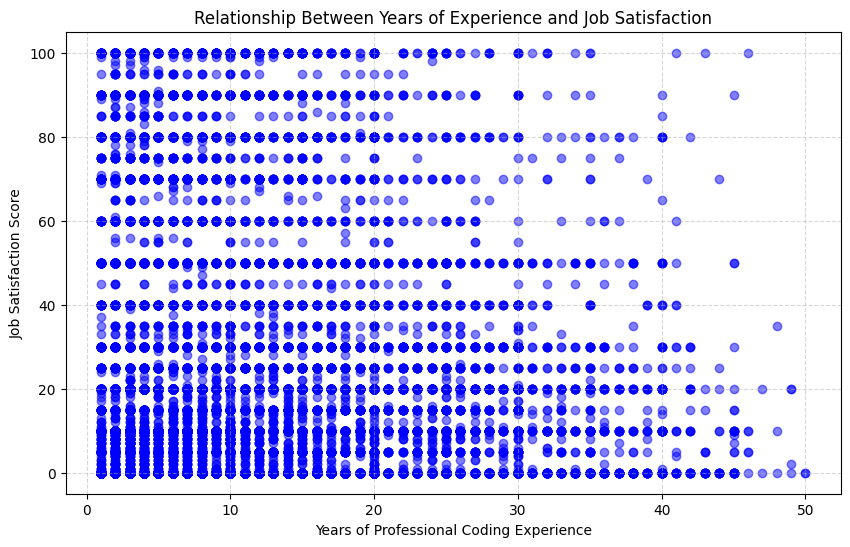

In [10]:
## Write your code here


# Convert 'YearsCodePro' to numeric (handling non-numeric values)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

# Drop rows with missing values in YearsCodePro or JobSatPoints_1
df_cleaned = df.dropna(subset=["YearsCodePro", "JobSatPoints_1"])

plt.figure(figsize=(10, 6))

# Scatter plot of YearsCodePro vs JobSatPoints_1
plt.scatter(df_cleaned["YearsCodePro"], df_cleaned["JobSatPoints_1"], alpha=0.5, color='blue')

# Labels and title
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score")
plt.title("Relationship Between Years of Experience and Job Satisfaction")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                           59.063023   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  67.380322   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               70.778428   
Primary/elementary school                                     13.961606   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                69.797980   
Secondary school (e.g. American high school, Ge...            25.202831   
Some college/university study without earning a...            46.778199   
Something else                                                40.450644   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

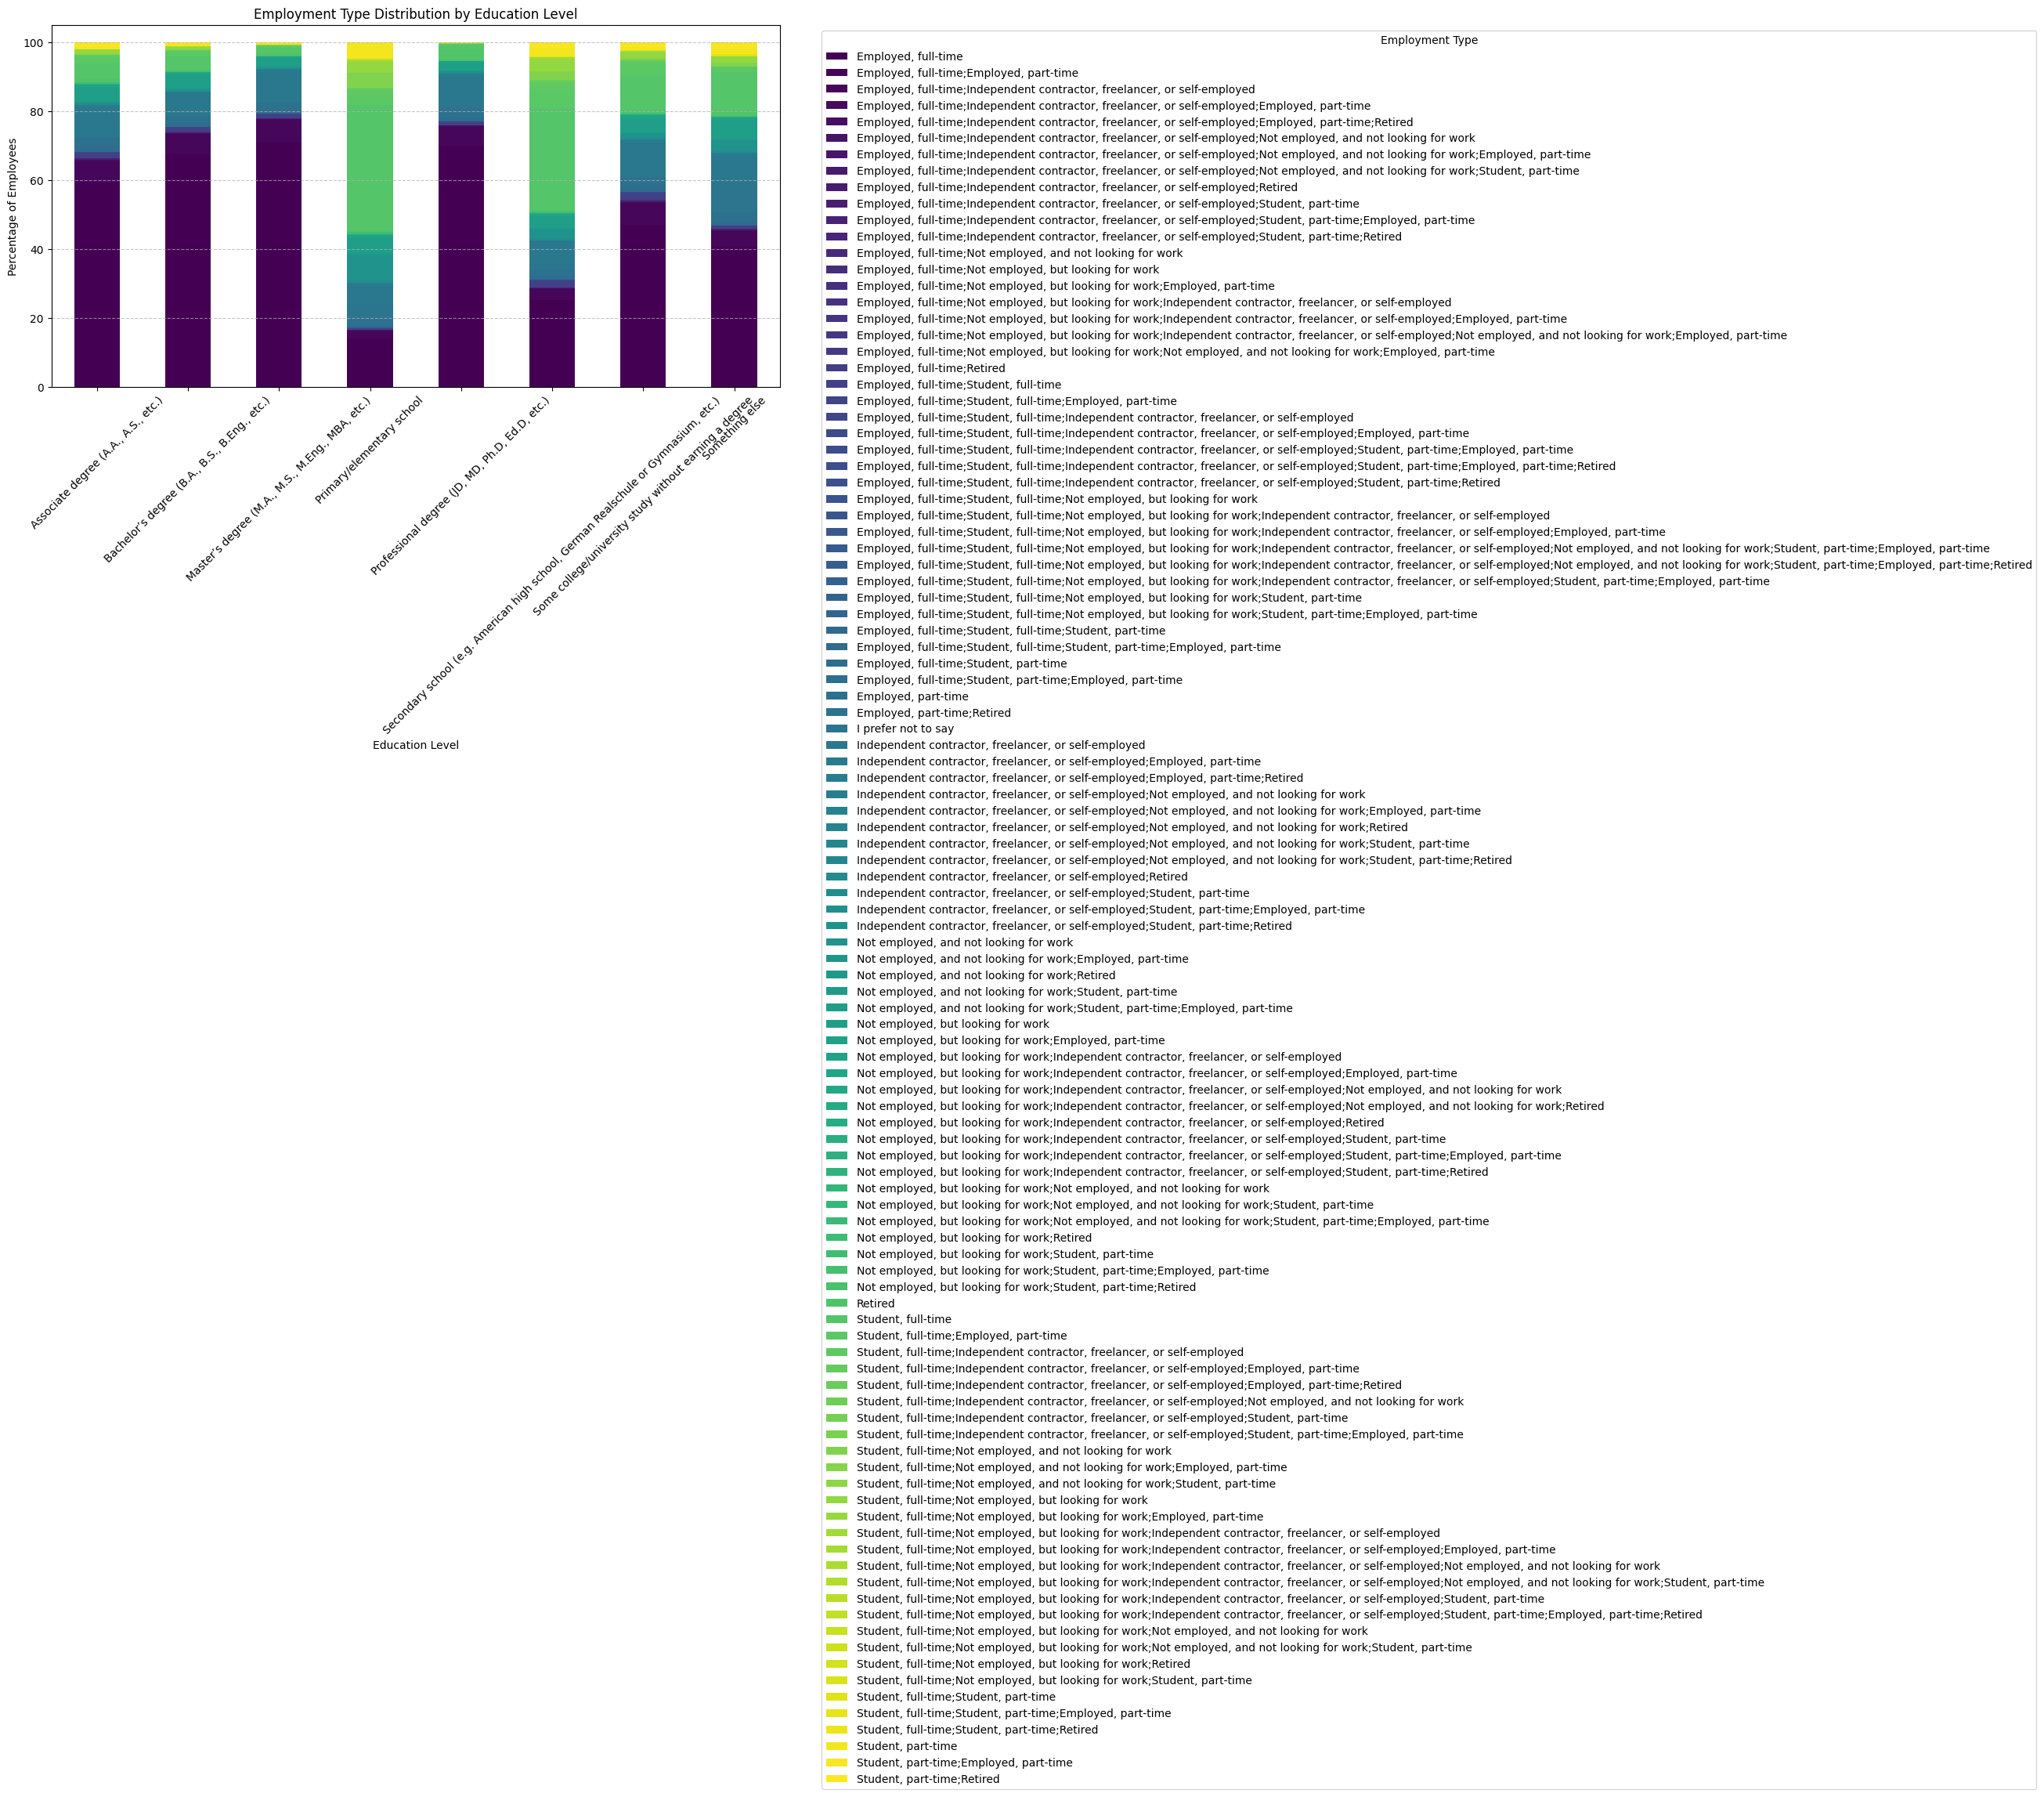

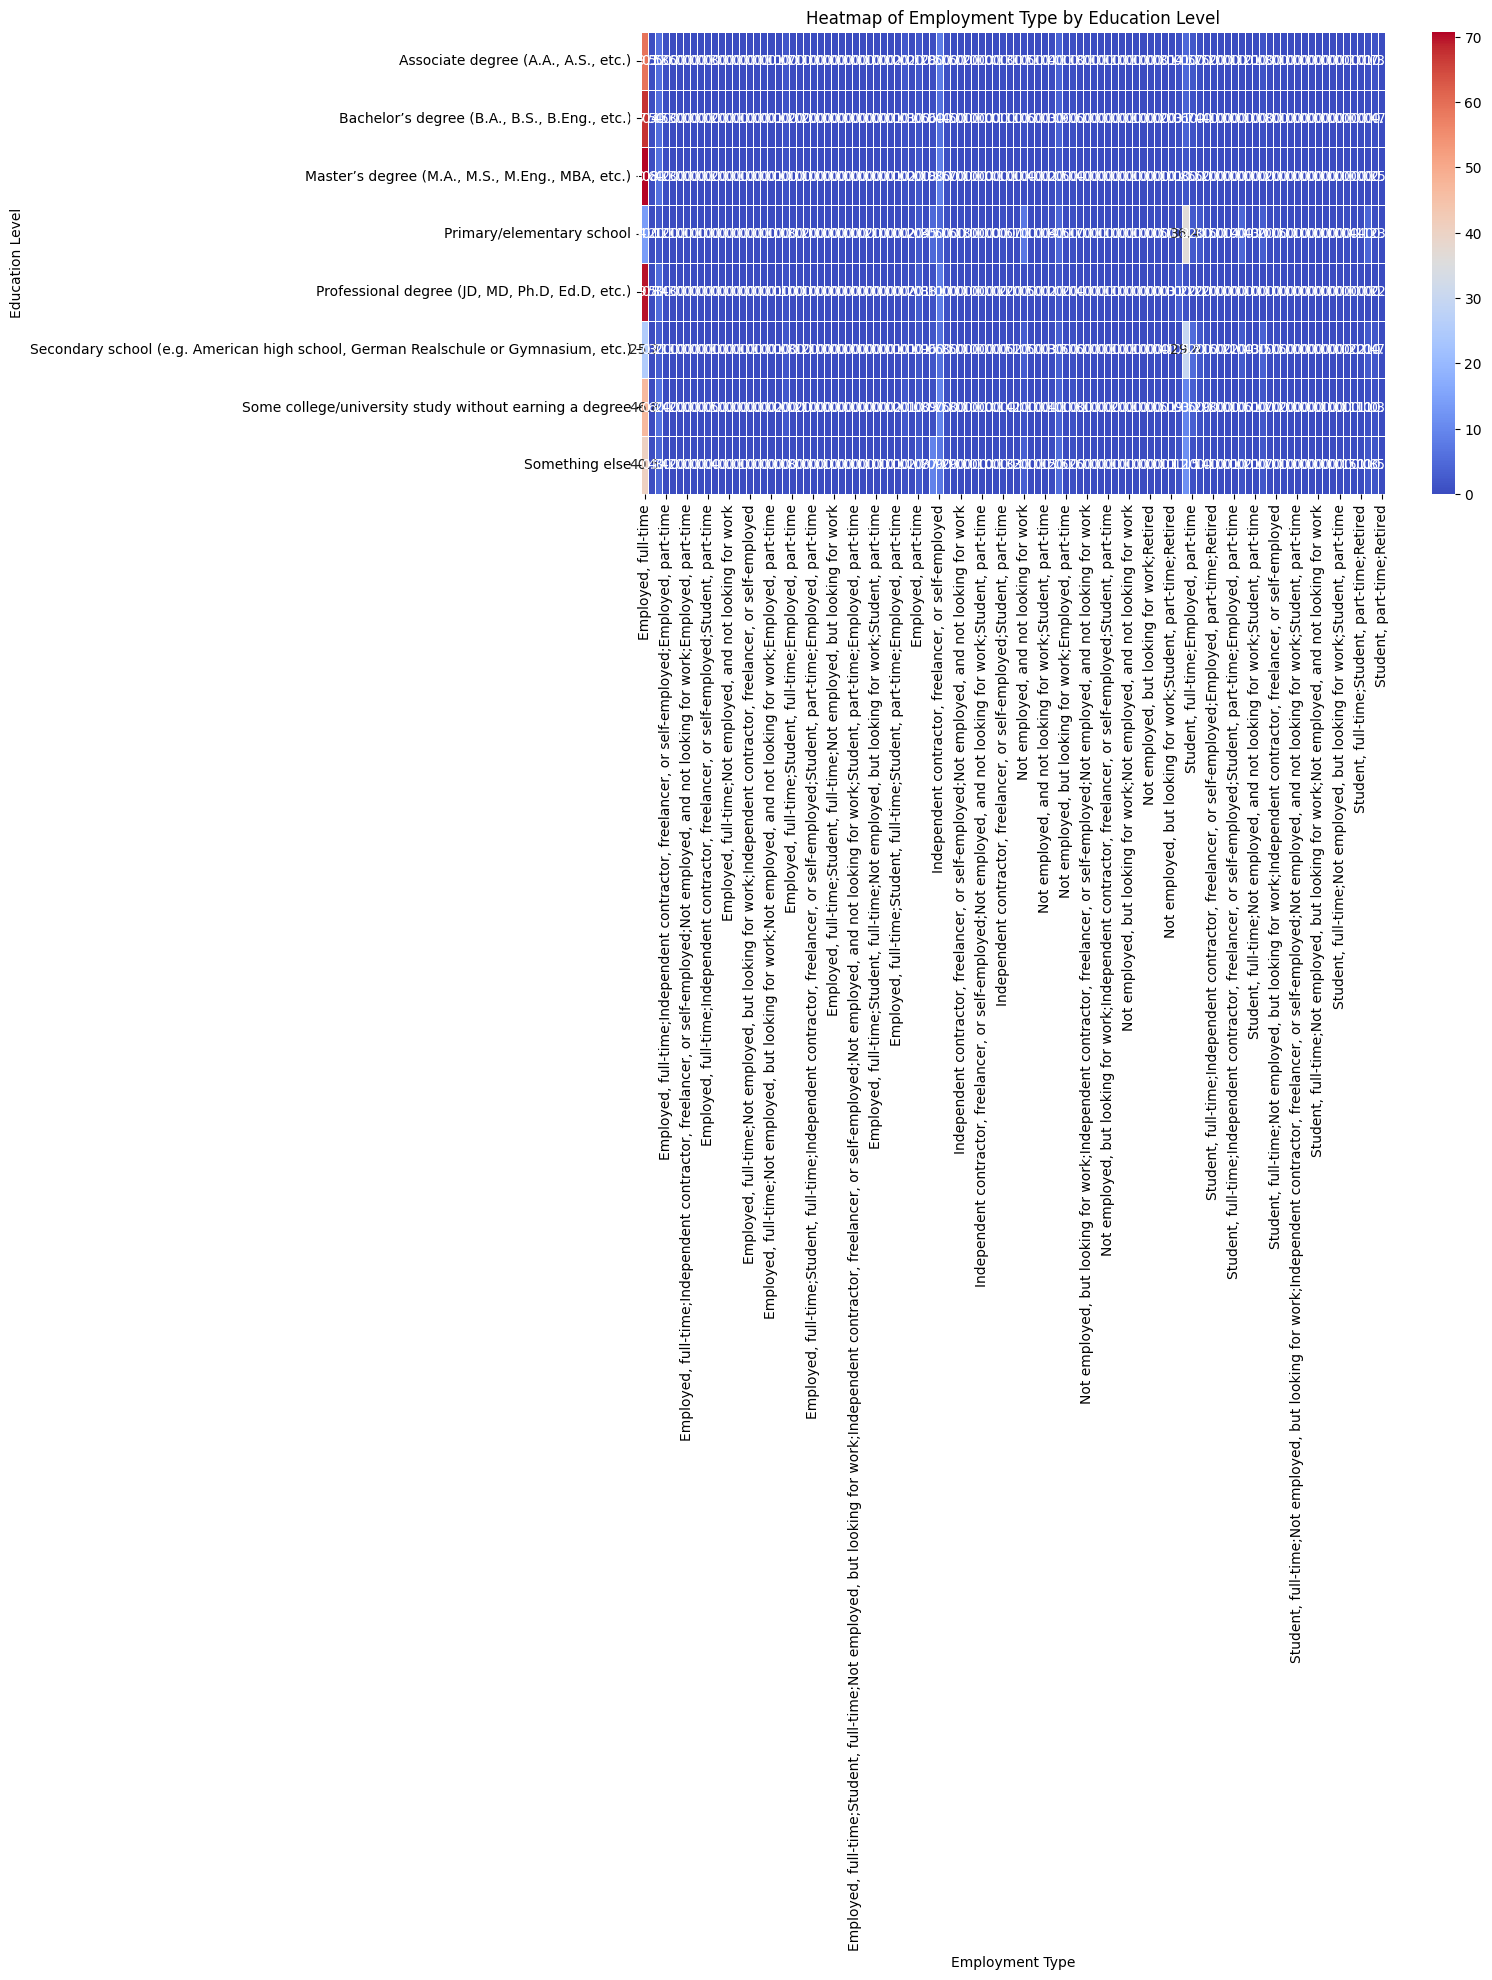

In [9]:
## Write your code here
# Create a cross-tabulation table
edlevel_employment_crosstab = pd.crosstab(df["EdLevel"], df["Employment"], normalize="index") * 100

# Display the cross-tabulation
print(edlevel_employment_crosstab)

# Plot a stacked bar chart
edlevel_employment_crosstab.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

# Add labels and title
plt.title("Employment Type Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage of Employees")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(edlevel_employment_crosstab, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

# Add labels and title
plt.title("Heatmap of Employment Type by Education Level")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")

# Show the plot
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [12]:
## Write your code here
# Save as an Excel file (optional)
df.to_csv('modified_dataset.csv', index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
